## Machine Learning A-Z™

© Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team |
[Super Data Science](http://www.superdatascience.com)

Part 10: Model Selection + Gradient Boosting | Section 48: Model Selection_k-fold cross validation

Created on Apr  22, 2019
@author: yinka_ola

---

In [1]:
## ---

## Goal of Section:
## how do i know which model to choose?
## how do i know which parameter to select?
## is my problem a linear or non linear?
## Evaluating Model Performance: k-fold cross validation
## Improving Performance
## of only two independent variables. We did for two reasons:

## Evaluating Model Performance:
## we may have a variance problem
## judging our model performance on just 1 test set is not ideal
## k-fold validation
## it split our training set into 10 fold into 
## train model on 9-fold
## test on  the last fold 
## we can take an average and standard deviation to determine optimal selection
## the bias-variance tradeoff

## ---

## the model to be used is the kernel SVM 

## ---
## Grid Search
## how do i know which parameter to select? => Grid Search!
## is my problem a linear or non linear?
## ---

#Data Scenario: social networking ads
## Client is launching a brand new SUV
## Running an offer on social media
## What is the probability that they will take up the offer?
## Predict if user will take up the offer or not (buy or not buy)
## Find correlation between age, salary and decision to purchase

## ---

In [20]:
# Importing the libraries
import pandas as pd #data
import numpy as np #mathematics
import os
#plotting packages
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5
#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [6]:
## Data Preprocessing
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [7]:
## independent variable
x = dataset.iloc[:, [2, 3]].values

## dependent variable
y = dataset.iloc[:, 4].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
## must be applied when using dimensionality reduction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [13]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
mean = accuracies.mean()
print(mean)

0.9005302187615868


In [14]:
#standard deviation
std = accuracies.std()
print(std)


0.06388957356626285


In [15]:
# Applying Grid Search to find the best model and the best parameters
# be careful of overfitting and under fitting
## play around with gamma
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)


0.9033333333333333
{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
## best accuracy
best_accuracy = grid_search.best_score_
print(best_accuracy)

0.9033333333333333


In [18]:
## best parameter
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [16]:
##Observation:
## hence, the most appropraite model is the non linear model 'gamma'
## this is a result of parameter tuning

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


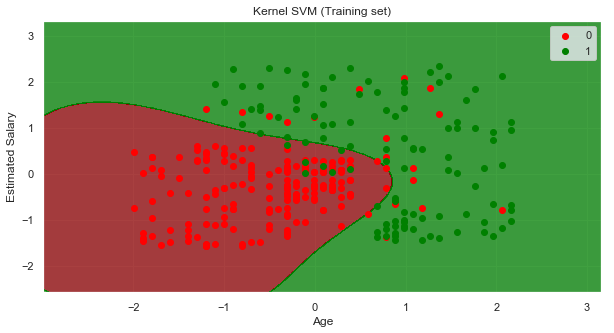

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


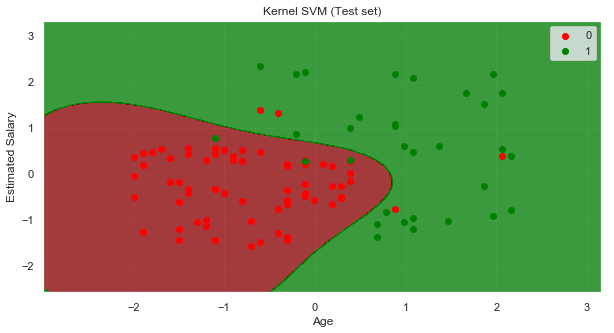

In [23]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()